<class 'Estimation.BoostedTreesRanker.BoostedTreesRanker'>


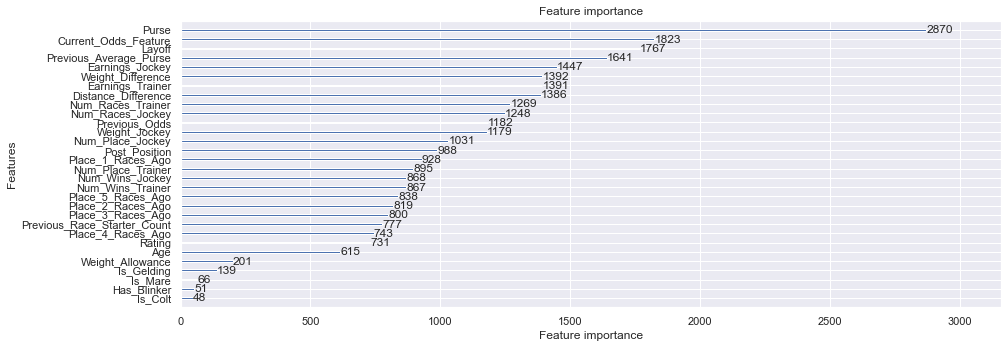

In [29]:
import pickle
from lightgbm import plot_importance

ESTIMATOR_PATH = "data/estimator.dat"

fund_history_summaries = []
with open(ESTIMATOR_PATH, "rb") as f:
    estimator = pickle.load(f)
    
print(type(estimator))
plot_importance(estimator.ranker)

In [30]:
from abc import ABC, abstractmethod
from dataclasses import dataclass
from typing import List
from pathlib import Path
from IPython.display import display, HTML

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Experiments.FundHistorySummary import FundHistorySummary


def show_fund_snapshot_graphs(fund_history_summaries: List[FundHistorySummary]):        
    for fund_history_summary in fund_history_summaries:
        time_steps = [snapshot.time_step for snapshot in fund_history_summary.snapshots]
        wealth_snapshots = [snapshot.wealth for snapshot in fund_history_summary.snapshots]
        sns.set(rc={'figure.figsize':(14.7,5.27)})
        ax = sns.lineplot(x=time_steps, y=wealth_snapshots, ci=None)

        ax.set_xlabel(f"Anzahl Wetten")
        _ = ax.set_ylabel(f"Gewinn/Verlust in Euro")
    
def show_fund_history_summaries_table(fund_history_summaries: List[FundHistorySummary]):
    summary_data = [fund_history_summary.summary for fund_history_summary in fund_history_summaries]
    fund_summary_df = pd.DataFrame(
        summary_data, 
        columns=["name", "win", "loss", "win/loss", "bets won %", "#train/test samples"]
    )
    display(HTML(fund_summary_df.to_html()))
    
def show_success_rate(fund_history_summaries):
    successfull_summaries = [fund_history_summary for fund_history_summary in fund_history_summaries 
                             if fund_history_summary.win_loss_ratio > 1.0]
    n_successfull_summaries = len(successfull_summaries)
    success_percentage = (n_successfull_summaries / len(fund_history_summaries)) * 100
    print(f"Success rate: {success_percentage}%")
    
def show_mean_win_loss_ratio(fund_history_summaries):
    win_loss_ratios = [fund_history_summary.win_loss_ratio for fund_history_summary in fund_history_summaries]
    print(f"Mean win/loss ratio: {sum(win_loss_ratios) / len(win_loss_ratios)}")
    
def show_win_loss_ratio_distribution(fund_history_summaries: List[FundHistorySummary]):
    win_loss_ratios = [fund_history_summary.win_loss_ratio for fund_history_summary in fund_history_summaries]
    ax = sns.displot(x=win_loss_ratios, kind="kde", fill=True)
    ax.set_axis_labels(x_var="Win/loss ratio")
    plt.xticks(np.arange(1, 10, 1.0))

,name,win,loss,win/loss,bets won %,#train/test samples
0,Default,69.735332,46.628606,1.495548,0.123839,646
1,Default,88.644577,51.446548,1.723042,0.153846,650


Success rate: 100.0%
Mean win/loss ratio: 1.609295270183949


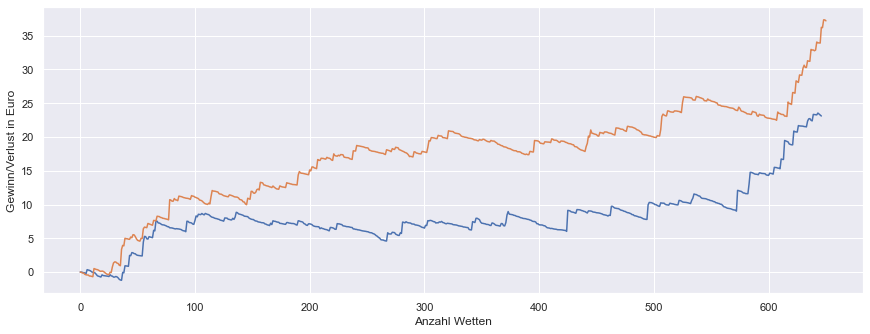

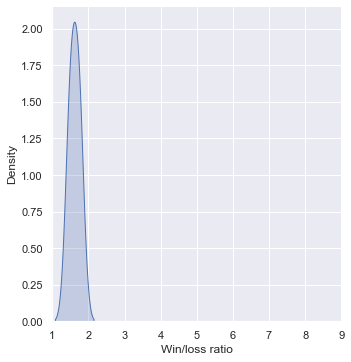

In [31]:
import pickle

FUND_HISTORY_SUMMARIES_PATH = "data/fund_history_summaries.dat"

fund_history_summaries = []
with open(FUND_HISTORY_SUMMARIES_PATH, "rb") as f:
    fund_history_summaries = pickle.load(f)

show_fund_history_summaries_table(fund_history_summaries)
show_fund_snapshot_graphs(fund_history_summaries)
show_win_loss_ratio_distribution(fund_history_summaries)
show_success_rate(fund_history_summaries)
show_mean_win_loss_ratio(fund_history_summaries)